In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv('height.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
df.shape

(500, 4)

### Measure of central tendency

- Mean - It is negatively affected by outliers

In [5]:
df.Height.mean()

169.944

In [6]:
df.Weight.mean()

106.0

In [7]:
df.Height.median()

170.5

In [8]:
df.Weight.median()

106.0

In [9]:
df.Height.mode()

0    188
dtype: int64

In [10]:
df.Weight.mode()

0     50
1     80
2    104
dtype: int64

### Visualize 

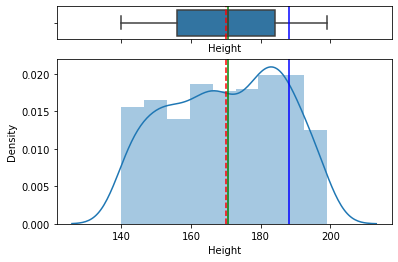

In [11]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios': (0.2, 1)})
mean = df['Height'].mean()
median = df['Height'].median()
mode = df['Height'].mode().to_numpy()[0]

sns.boxplot(df['Height'], ax = ax_box)
ax_box.axvline(mean, color = 'r', linestyle = '--')
ax_box.axvline(median, color = 'g',linestyle = '-')
ax_box.axvline(mode, color = 'b',linestyle = '-')

sns.distplot(df["Height"], ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle = '--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

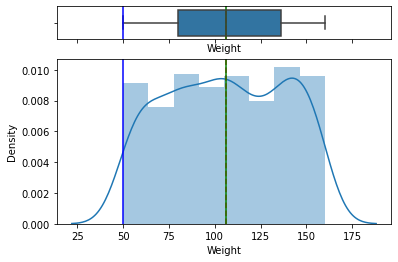

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios': (0.2, 1)})
mean = df['Weight'].mean()
median = df['Weight'].median()
mode = df['Weight'].mode().to_numpy()[0]

sns.boxplot(df['Weight'], ax = ax_box)
ax_box.axvline(mean, color = 'r', linestyle = '--')
ax_box.axvline(median, color = 'g',linestyle = '-')
ax_box.axvline(mode, color = 'b',linestyle = '-')

sns.distplot(df["Weight"], ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle = '--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

### Measures of Variability

The problem with Variance is that because of the squaring, it is not in the same unit of measurement as the original data. This is why the Standard Deviation is used more often because it is in the original unit (the standard deviation is equal to the squared root of the variance).

In [13]:
df.Height.var()


268.1491623246493

In [14]:
df.Height.std()

16.375260679593755

### IQR

In [15]:
quartiles = [0.25, 0.5, 0.75]
df.Height.quantile(q= quartiles)

0.25    156.0
0.50    170.5
0.75    184.0
Name: Height, dtype: float64

In [16]:
df.Weight.quantile(q  = quartiles)

0.25     80.0
0.50    106.0
0.75    136.0
Name: Weight, dtype: float64

### Covariance and Correlation

Covarience is the measure that indicates how two variables are related
covariance does not use one standard unit of measurement.

-ve covariance means the variables are inversely related
Increase in one value will decrease another

+ve covariance means if one value increase, another value will also increases

- covariance shows us how the two variables vary from each other whereas correlation shows us the relationship between the two variables and how are they related.

- Now, when it comes to making a choice, which is a better measure of the relationship between two variables, correlation is preferred over covariance, because it remains unaffected by the change in location and scale, and can also be used to make a comparison between two pairs of variables.

In [17]:
covariance = df['Height'].cov(df["Weight"])
print(covariance)

0.23647294589178355


In [18]:
covariance = df["Index"].cov(df["Weight"])
print(covariance)


35.30460921843686


Correlation = this unit of measure standardizes the measure of interdependence between two variables and, consequently, tells us how closely the two variables move. The correlation measurement, called a correlation coefficient, will always take on a value between 1 and -1.

- -1 means negatively correlated
- +1 means positively correlated

In [19]:
correlation = df["Height"].corr(df["Weight"])
print(correlation)

0.00044594512830535104


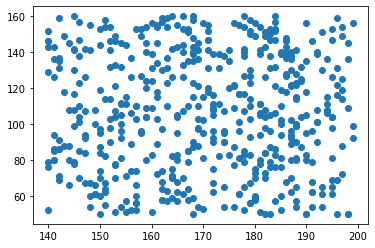

In [20]:
plt.scatter(df["Height"], df["Weight"])

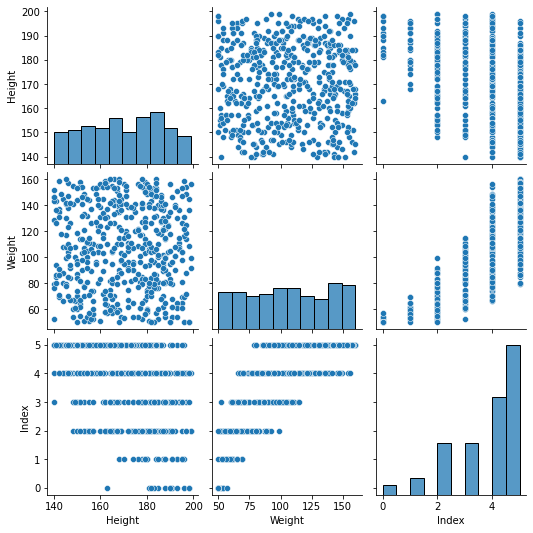

In [21]:
sns.pairplot(df)

### Spearman Correlation

It forgets the variables values and consider only their relative (rank). By ranking the data, lowest person will have the rank 1 and same as in Weight

In [28]:
df[["Height","Weight"]].rank().head()

,Height,Weight
0,278.5,203.5
1,435.0,165.0
2,389.0,274.5
3,474.5,239.0
4,66.0,53.0


so, here 1st record has the rank 278.5
- 174 is in 278.5th record

<AxesSubplot:xlabel='Weight', ylabel='Height'>

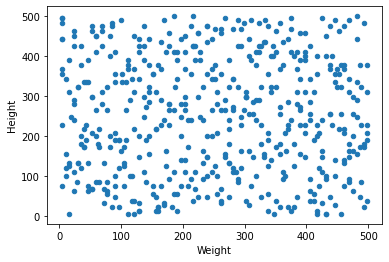

In [30]:
df[["Height","Weight"]].rank().plot.scatter(x = "Weight", y = "Height")

### Pearson Correlation

correlation between the rank coefficients

In [31]:
ranked_data = df[["Height","Weight"]].rank()

In [32]:
ranked_data["Height"].corr(ranked_data["Weight"])

-0.0012863887864474118

In [33]:
df["Weight"].corr(df["Height"], method = 'spearman')

-0.0012863887864474118

### Correlation Matrix

In [34]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [38]:
sns.heatmap(df.corr(),cmap='brBG')

ValueError: 'brBG' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'